# Data Preprocessing
## Data Cleaning

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('traffic_volume.csv')
print(df.head())
print(df.shape)
print(((df.isnull().sum())*100)/len(df))

  holiday    temp  rain  snow weather        date      Time  traffic_volume
0     NaN  288.28   0.0   0.0  Clouds  02-10-2012  09:00:00            5545
1     NaN  289.36   0.0   0.0  Clouds  02-10-2012  10:00:00            4516
2     NaN  289.58   0.0   0.0  Clouds  02-10-2012  11:00:00            4767
3     NaN  290.13   0.0   0.0  Clouds  02-10-2012  12:00:00            5026
4     NaN  291.14   0.0   0.0  Clouds  02-10-2012  13:00:00            4918
(48204, 8)
holiday           99.873454
temp               0.109949
rain               0.004149
snow               0.024894
weather            0.101651
date               0.000000
Time               0.000000
traffic_volume     0.000000
dtype: float64


In [3]:
# Delete column 'holiday'
# delete the rows wit null values in 'temp', 'rain', 'snow', 'weather'
#--------------Handling NUll values-------------

In [4]:
df=df.drop(columns=['holiday'], axis=1)
df.dropna(inplace=True)
print(df.shape)
print(df.isnull().sum())

(48090, 7)
temp              0
rain              0
snow              0
weather           0
date              0
Time              0
traffic_volume    0
dtype: int64


In [5]:
#--------------Handling data Inconsistency-------------

In [6]:
df['Time'] = pd.to_datetime(df['Time']).dt.hour
df.head()

C:\Users\sonyp\AppData\Local\Temp\ipykernel_13164\2747776844.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.hour


,temp,rain,snow,weather,date,Time,traffic_volume
0,288.28,0.0,0.0,Clouds,02-10-2012,9,5545
1,289.36,0.0,0.0,Clouds,02-10-2012,10,4516
2,289.58,0.0,0.0,Clouds,02-10-2012,11,4767
3,290.13,0.0,0.0,Clouds,02-10-2012,12,5026
4,291.14,0.0,0.0,Clouds,02-10-2012,13,4918


In [7]:
#--------------Handling unusual entry or noise-------------

In [8]:
print(df.dtypes)
print(df['weather'].unique())
print((df['temp']==0).sum())
df.drop(df[df['temp'] < 100].index, inplace=True)

temp              float64
rain              float64
snow              float64
weather            object
date               object
Time                int32
traffic_volume      int64
dtype: object
['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']
10


In [9]:
#--------------Handling dublicates-------------

In [10]:
df[df.duplicated()]
df.drop_duplicates(inplace=True)
print(df[df.duplicated()])

Empty DataFrame
Columns: [temp, rain, snow, weather, date, Time, traffic_volume]
Index: []


In [11]:
## ----------Handling outliers--------------------

In [12]:
df.shape

(47849, 7)

In [13]:
q1 = df['traffic_volume'].quantile(0.1)  
q2 = df['traffic_volume'].quantile(0.9)  
df = df[(df['traffic_volume'] >= q1) & (df['traffic_volume'] <= q2)]
print(df.shape)

(38290, 7)


In [14]:
df.describe()

,temp,rain,snow,Time,traffic_volume
count,38290.000000,38290.000000,38290.000000,38290.000000,38290.000000
mean,281.319167,0.387881,0.000253,12.416584,3252.662993
std,12.876505,50.251270,0.008965,6.806973,1653.061734
min,243.390000,0.000000,0.000000,0.000000,425.000000
25%,272.080000,0.000000,0.000000,7.000000,1805.250000
50%,282.550000,0.000000,0.000000,12.000000,3379.000000
75%,292.150000,0.000000,0.000000,19.000000,4721.000000
max,310.070000,9831.300000,0.510000,23.000000,5820.000000


In [15]:
# df.to_csv('cleaned_traffic_volume.csv', index=False)

## Visualization

C:\Users\sonyp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sonyp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sonyp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sonyp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

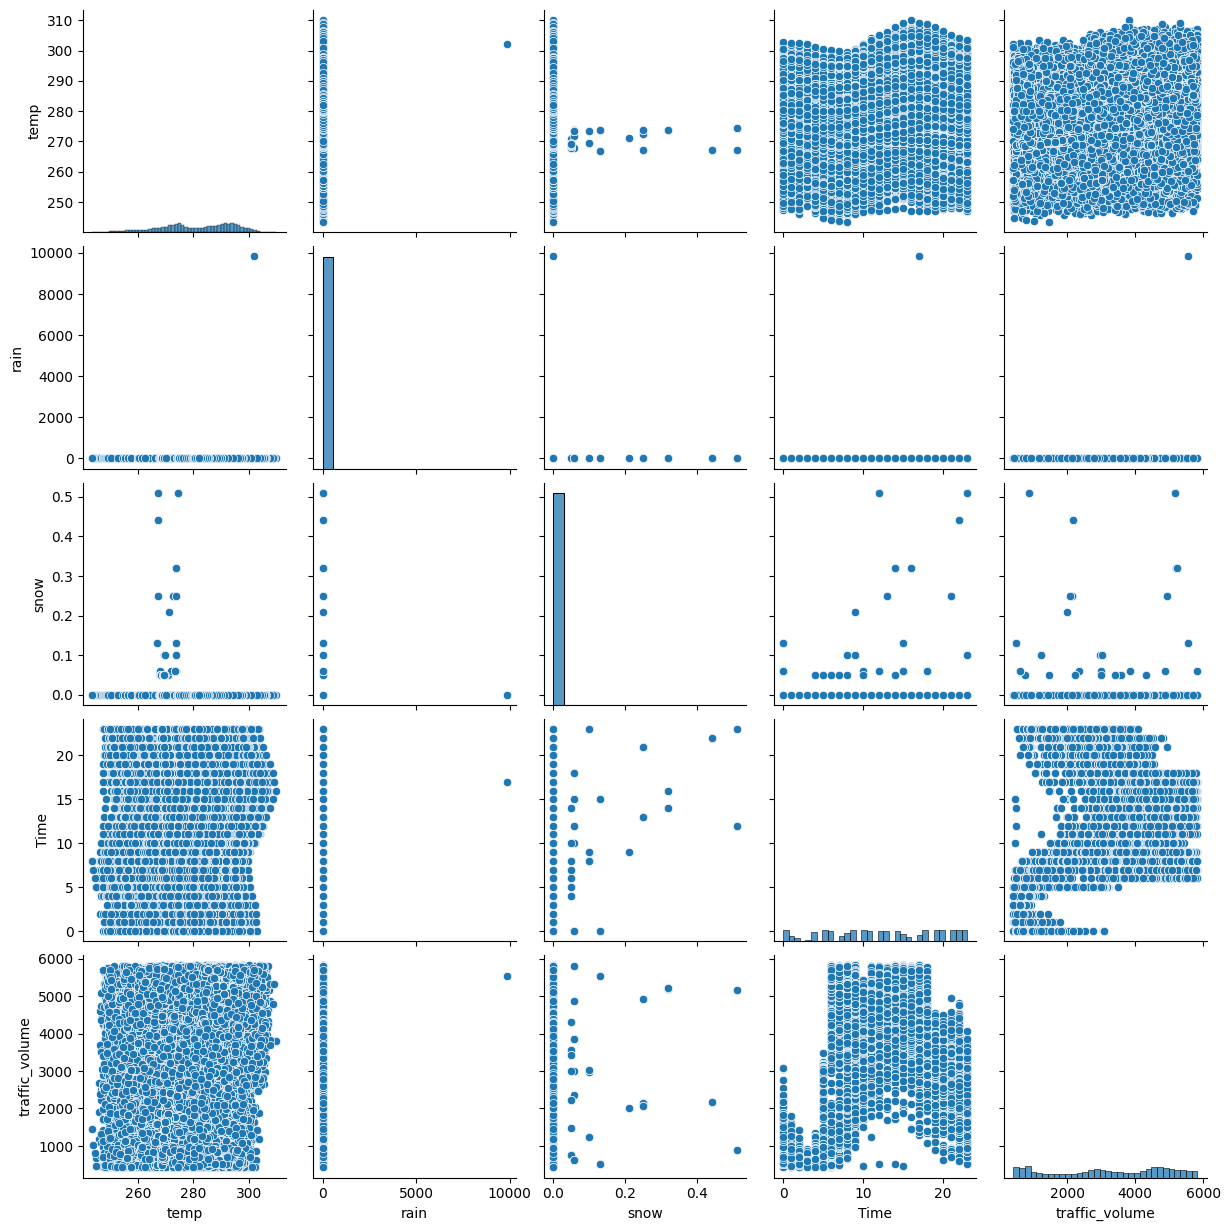

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

## Data Transformation

In [17]:
print(df.shape)
print(df.head())

(38290, 7)
     temp  rain  snow weather        date  Time  traffic_volume
0  288.28   0.0   0.0  Clouds  02-10-2012     9            5545
1  289.36   0.0   0.0  Clouds  02-10-2012    10            4516
2  289.58   0.0   0.0  Clouds  02-10-2012    11            4767
3  290.13   0.0   0.0  Clouds  02-10-2012    12            5026
4  291.14   0.0   0.0  Clouds  02-10-2012    13            4918


In [18]:
#-----------handling imbalance data------------

In [19]:
print(((df['rain']==0).sum())*100/len(df))
print(((df['snow']==0).sum())*100/len(df))

92.836249673544
99.85897101070776


In [20]:
#delete column 'snow' as it has 99% of data as zero
df = df.drop(columns=['snow'], axis=1)

In [21]:
#-----------ading features------------

In [22]:
def add_features(df):
    df['date'] = pd.to_datetime(df['date'], format = '%d-%m-%Y')
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['week_day'] = df['date'].dt.day_name()
    return df.drop(columns = ['date'], axis = 1)

In [23]:
df = add_features(df)
df

,temp,rain,weather,Time,traffic_volume,year,month,day,week_day
0,288.28,0.0,Clouds,9,5545,2012,10,2,Tuesday
1,289.36,0.0,Clouds,10,4516,2012,10,2,Tuesday
2,289.58,0.0,Clouds,11,4767,2012,10,2,Tuesday
3,290.13,0.0,Clouds,12,5026,2012,10,2,Tuesday
4,291.14,0.0,Clouds,13,4918,2012,10,2,Tuesday
...,...,...,...,...,...,...,...,...,...
48199,283.45,0.0,Clouds,19,3543,2018,9,30,Sunday
48200,282.76,0.0,Clouds,20,2781,2018,9,30,Sunday
48201,282.73,0.0,Thunderstorm,21,2159,2018,9,30,Sunday
48202,282.09,0.0,Clouds,22,1450,2018,9,30,Sunday


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.weather = le.fit_transform(df.weather)

In [25]:
# df.to_csv('transformed_traffic_volume.csv', index=False)

In [26]:
# -------------------------------Model Training---------------------------------------------------------------------------------------------------

In [27]:
print(df.shape)
print(df.head())

(38290, 9)
     temp  rain  weather  Time  traffic_volume  year  month  day week_day
0  288.28   0.0        1     9            5545  2012     10    2  Tuesday
1  289.36   0.0        1    10            4516  2012     10    2  Tuesday
2  289.58   0.0        1    11            4767  2012     10    2  Tuesday
3  290.13   0.0        1    12            5026  2012     10    2  Tuesday
4  291.14   0.0        1    13            4918  2012     10    2  Tuesday


In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.week_day = le.fit_transform(df.week_day)
df

,temp,rain,weather,Time,traffic_volume,year,month,day,week_day
0,288.28,0.0,1,9,5545,2012,10,2,5
1,289.36,0.0,1,10,4516,2012,10,2,5
2,289.58,0.0,1,11,4767,2012,10,2,5
3,290.13,0.0,1,12,5026,2012,10,2,5
4,291.14,0.0,1,13,4918,2012,10,2,5
...,...,...,...,...,...,...,...,...,...
48199,283.45,0.0,1,19,3543,2018,9,30,3
48200,282.76,0.0,1,20,2781,2018,9,30,3
48201,282.73,0.0,10,21,2159,2018,9,30,3
48202,282.09,0.0,1,22,1450,2018,9,30,3


In [29]:
#------------seperating values----------
y_value = df.iloc[:,4]
x_value = df.drop(columns=['traffic_volume', 'temp', 'year'], axis=1)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_scaled=scale.fit_transform(x_value)

# Model Training & Testing

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_value, test_size=0.2)

In [32]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
y_pred=model.predict(x_test)
from sklearn.metrics import mean_squared_log_error, r2_score
r2_score(y_test, y_pred)

0.9562897245070451

In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Mean Square Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R-square Score: ", r2_score(y_test, y_pred))

Mean Square Error:  120655.80901256463
Mean Absolute Error:  229.23090384367023
R-square Score:  0.9562897245070451


# Hyperparameters tuning

In [35]:
hyp_pars=model.get_params()
print(hyp_pars)

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [36]:
from sklearn.model_selection import GridSearchCV
parameters={
    'max_depth': [3, 5, 8],
    'min_child_weight': [1, 3, 5],
    'eta': [0.1, 0.3, 0.5],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1]
}
clf = GridSearchCV(xgb.XGBRegressor(), param_grid=parameters,verbose=2, cv=5)

clf.fit(x_train,y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END colsample_bytree=0.6, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, eta=0.1, max_depth=3, min_child_weight=1, subsamp

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1],
                         'eta': [0.1, 0.3, 0.5], 'max_depth': [3, 5, 8],
                         'min_child_weight': [1, 3, 5],
                         'subsample': [0.6, 0.8, 1]},
             verbose=2)

In [37]:
y_pred=clf.predict(x_test)
print("Best Score: ", r2_score(y_test, y_pred))
clf.best_params_

Best Score:  0.9671001283397865


{'colsample_bytree': 1,
 'eta': 0.5,
 'max_depth': 8,
 'min_child_weight': 1,
 'subsample': 1}

In [38]:
y_pred=clf.predict(x_test)
print("Mean Square Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R-square Score: ", r2_score(y_test, y_pred))

Mean Square Error:  90815.27368118295
Mean Absolute Error:  198.72005488947872
R-square Score:  0.9671001283397865


In [39]:
model=xgb.XGBRegressor()

parameters={
    'max_depth': [3, 5, 8],
    'min_child_weight': [1, 3, 5],
    'eta': [0.1, 0.3, 0.5],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1]
}